# SVD and LSA
**Written by Christian Alis**

## Singular value decomposition

SVD decomposes an $n \times d$ matrix $\mathbf D$ into $\mathbf{D}=\mathbf{Q\Sigma P}^T$ where
* $\mathbf{Q}$ is an $n \times n$ matrix of orthonormal columns (left singular vectors)
* $\mathbf{\Sigma}$ is an $n \times d$ diagonal matrix of singular values
* $\mathbf{P}$ is a $d \times d$ matrix of orthonormal columns (right singular vectors).

Recall that for any matrix $\mathbf{M}$ with eigenvector matrix $\mathbf{V}$ and eigenvalue matrix $\mathbf{\lambda}$,
$$
\mathbf{MV} = \mathbf{V \Lambda} \Rightarrow \mathbf{M} = \mathbf{V \Lambda V^{-1}}.
$$
With that, we can see that $\mathbf{Q}$ is the eigenvector of $\mathbf{DD}^T$,
$$
\begin{align}
\mathbf{DD}^T \mathbf{Q} &= (\mathbf{Q\Sigma P}^T)(\mathbf{Q\Sigma P}^T)^T\mathbf{Q} \\
    &= (\mathbf{Q\Sigma P}^T)(\mathbf{P \Sigma}^T \mathbf{Q}^T)\mathbf{Q} \\
    &= \mathbf{Q\Sigma} (\mathbf{P}^T \mathbf{P}) \mathbf{\Sigma}^T (\mathbf{Q}^T\mathbf{Q}) \\
    &= \mathbf{Q\Sigma} \mathbf{\Sigma}^T.
\end{align}
$$
The eigenvalues are $\mathbf{\Sigma \Sigma}^T$ which is the square of the singular values $\mathbf \Sigma$.

Similarly, $\mathbf{P}$ is the eigenvector of $\mathbf{D}^T\mathbf{D}$,
$$
\begin{align}
\mathbf{D}^T \mathbf{DP} &= (\mathbf{Q\Sigma P}^T)^T(\mathbf{Q\Sigma P}^T)\mathbf{P} \\
    &= (\mathbf{P \Sigma}^T \mathbf{Q}^T)(\mathbf{Q\Sigma P}^T)\mathbf{P} \\
    &= \mathbf{P \Sigma}^T (\mathbf{Q}^T \mathbf{Q}) \mathbf{\Sigma} (\mathbf{P}^T \mathbf{P}) \\
    &= \mathbf{P \Sigma}^T \mathbf{\Sigma}.
\end{align}
$$
The eigenvalues are $\mathbf{\Sigma}^T \mathbf{\Sigma}$, which is the square of the singular values $\mathbf \Sigma$.

The columns of $\mathbf{P}$ are basis vectors similar to principal components. In fact, since the covariance matrix is given by $\frac{\mathbf{X}^T \mathbf{X}}{n}$ where $\mathbf X$ is mean-centered, they match the principal components if $\mathbf{D} = \mathbf{X}$. In that case, the $i$th PCA eigenvalue is given by $\lambda_i = \sigma_i^2/n$. In general, the square of the singular values correspond to the sum of square distance from the origin.

To reduce the number of dimensions to $k$, we truncate $\mathbf{Q}$, $\mathbf{\Sigma}$ and $\mathbf{P}$ into $n \times k$, $k \times k$ and $d \times k$ matrices, respectively, as shown below. This is known as a truncated SVD.

<div style="text-align: center">
<img src="truncated.png" style="width: 30em" />
Figure from C. Aggarwal, Data Mining: The Textbook
</div>

The truncated dataset $\mathbf D_k$ can then be computed using $\mathbf{D_k} = \mathbf{D P_k} = \mathbf{Q_k \Sigma_k}$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston, fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy.testing import assert_equal, assert_array_almost_equal

**Problem 5**

Create a function `truncated_svd` that accepts the design matrix and returns q, sigma, p and the normalized sum of squared distance from the origin. Do not use scikit-learn.

In [6]:
def truncated_svd(X):
    q,s,p = np.linalg.svd(X)
    return q, np.diag(s), p.T, ((s**2)/np.sum(s**2))

In [7]:
np.random.seed(1337)
X = 5 * np.random.random([100, 50]) - 2
q, s, p, nssd = truncated_svd(X)
assert_equal(q.shape, (100, 100))
assert_equal(s.shape, (50, 50))
assert_equal(p.shape, (50, 50))
assert_equal(nssd.shape, (50,))
assert_array_almost_equal(
    q[0,:10],
    [0.05369606,  0.0022409 , -0.06412507,  0.05151757, -0.06354081,
     -0.15508587, -0.05911108, -0.02121539, -0.08012368, -0.07653017]
)
assert_array_almost_equal(
    q[0,-10:],
    [-0.0584993 ,  0.12081681, -0.09726406,  0.03155428,  0.08257467,
     -0.11292813,  0.06478847, -0.12959424, -0.0345205 , -0.05331878]
)
assert_array_almost_equal(
    s[0, :10],
    [41.68915809,  0.        ,  0.        ,  0.        ,  0.        ,
     0.        ,  0.        ,  0.        ,  0.        ,  0.        ]
)
assert_array_almost_equal(
    s[0, -10:],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
)
assert_array_almost_equal(
    p[0,:10],
    [0.21295343,  0.09420471, -0.04920721,  0.01502752, -0.13188445,
     0.1757621 , -0.13239397,  0.08611663, -0.04598532,  0.09217575]
)
assert_array_almost_equal(
    p[0, -10:],
    [-0.04569402, -0.30069775,  0.28421034,  0.02774113, -0.24863976,
     -0.14502966,  0.02648434,  0.04945776, -0.11822463,  0.03410183]
)
assert_array_almost_equal(
    nssd[:10],
    [0.1466244 , 0.04810068, 0.04446493, 0.04068079, 0.03853809,
     0.0364595 , 0.03501169, 0.03217666, 0.03172149, 0.03082184]
)

## Truncated SVD on the Boston House Prices dataset

We again use the [Boston House Prices](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset) dataset for illustration.

In [8]:
bhp = load_boston()
print(bhp.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We remove the indicator variable.

In [9]:
X = np.hstack((bhp.data[:,:3], bhp.data[:,4:]))
features = np.concatenate((bhp.feature_names[:3], bhp.feature_names[4:]))

We perform truncated SVD on `X`.

In [10]:
q, s, p, nssd = truncated_svd(X)

We project the standardized values onto the first two singular vectors then plot them.

In [11]:
X_new = X.dot(p[:,:2])

We used $\mathbf{D_k} = \mathbf{D P_k}$ to compute the reduced design matrix. As expected, the result is the same if we use $\mathbf{D_k} = \mathbf{Q_k \Sigma_k}$ instead.

In [12]:
np.allclose(q[:,:2].dot(s[:2,:2]), X_new)

True

We plot them in the same manner as in PCA. The plot can be interpreted similar to PCA as well.

In [13]:
def plot_svd(X_new, features, p):
    """
    Plot transformed data and features on to the first two singular vectors
    
    Parameters
    ----------
    X_new : array
        Transformed data
    featurs : sequence of str
        Feature names
    p : array
        P matrix
    """
    fig, ax = plt.subplots(1, 2, subplot_kw=dict(aspect='equal'), 
                           gridspec_kw=dict(wspace=0.4), dpi=150)
    ax[0].scatter(X_new[:,0], X_new[:,1])
    ax[0].set_xlabel('SV1')
    ax[0].set_ylabel('SV2')

    for feature, vec in zip(features, p):
        ax[1].arrow(0, 0, vec[0], vec[1], width=0.01, ec='none', fc='r')
        ax[1].text(vec[0], vec[1], feature, ha='center', color='r', fontsize=5)
    ax[1].set_xlim(-1, 1)
    ax[1].set_ylim(-1, 1)
    ax[1].set_xlabel('SV1')
    ax[1].set_ylabel('SV2')

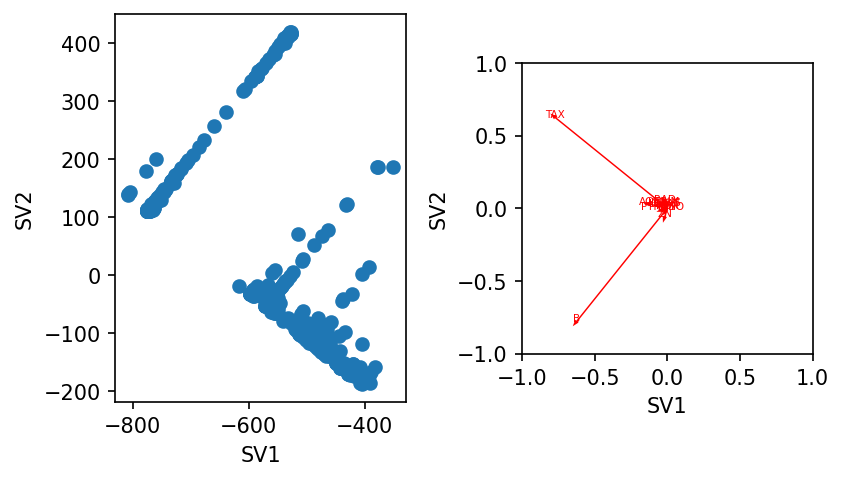

In [14]:
plot_svd(X_new, features, p)

**Problem 6**

Interpret the plots above.

- There is no correlation between the tax rate and proportion of blacks by town.

- High and low tax can be cluster into groups. It was observed that there is a gap for high and low taxes 

- The most important feature for SV1 and SV2 are Tax and B. 

**Problem 7**

Create a function `project_svd` that accepts `q`, `s` and `k` and returns the design matrix projected on to the first `k` singular vectors.

In [15]:
def project_svd(q, s, k):
    return q[:,:k] @s[:k, :k]

In [16]:
np.random.seed(42)
q = np.random.random_sample((100, 100))
s = np.random.random_sample((100, 50))
X_test = project_svd(q, s, 10)
assert_array_almost_equal(
    X_test[0],
    [3.51714679, 2.71101116, 2.65203378, 2.53525919, 3.39305086,
     1.74620742, 2.05454564, 2.55333307, 2.22164107, 2.34931126]
)

Let us redo the analysis but this time, we mean-center `X` first.

In [17]:
X_centered = X - X.mean(axis=0)

In [18]:
q_center, s_center, p_center, nssd_center = truncated_svd(X_centered)
X_new_centered = project_svd(q_center, s_center, 2)

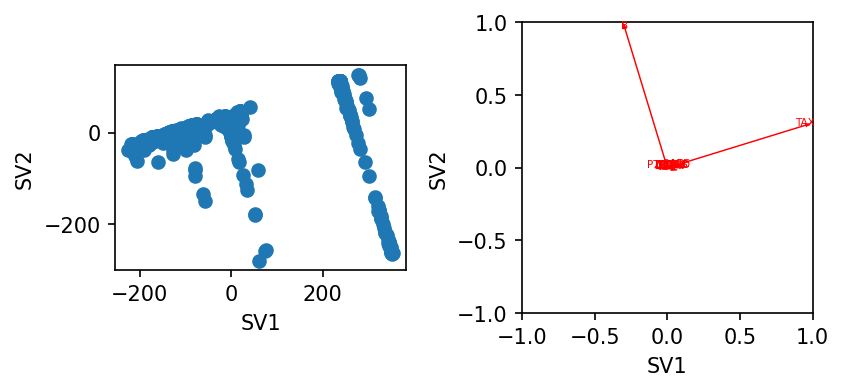

In [19]:
plot_svd(X_new_centered, features, p_center)

Let's compare it with the results for PCA on the unmean-centered `X`. The results are the same as for truncated SVD on mean-centered `X`.

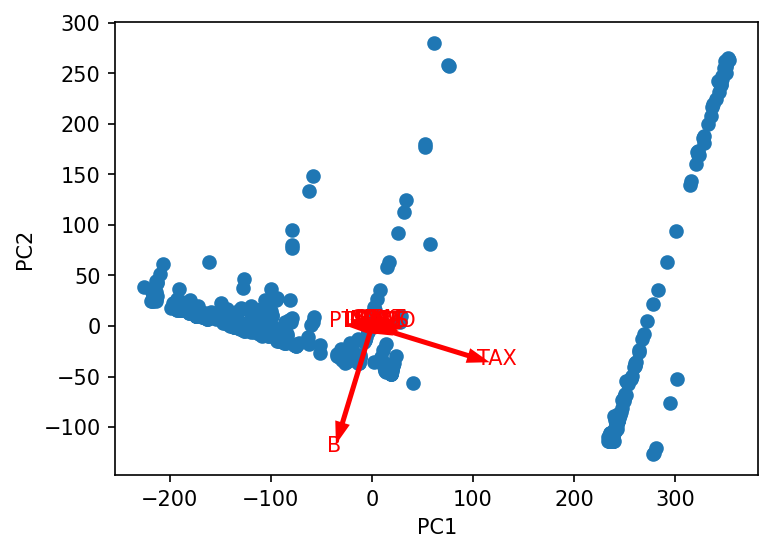

In [20]:
from sklearn.decomposition import PCA

pca = PCA()
X_new2 = pca.fit_transform(X)
fig, ax = plt.subplots(1, 1, subplot_kw=dict(aspect='equal'), dpi=150)
ax.scatter(X_new2[:,0], X_new2[:,1])
for feature, vec in zip(features, pca.components_.T):
    ax.arrow(0, 0, 100*vec[0], 100*vec[1], width=5, ec='none', fc='r')
    ax.text(130*vec[0], 130*vec[1], feature, ha='center', color='r')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2');

Similar to PCA, we can use the variance explained as a way for determining $k$. This is given by the normalized sum of squared distance from the origin and the variance being referred to here is the variance with respect to the origin (not with respect to the mean as in PCA).

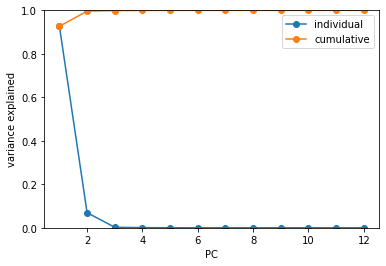

In [21]:
fig, ax = plt.subplots()
ax.plot(range(1, len(nssd)+1), nssd, 'o-', label='individual')
ax.plot(range(1, len(nssd)+1), nssd.cumsum(), 'o-', label='cumulative')
ax.legend()
ax.set_ylim(0, 1)
ax.set_xlabel('PC')
ax.set_ylabel('variance explained');

**Problem 8 [3 pts]**

Perform truncated SVD on the wines dataset. Make sure to include the number of singular vectors to be retained and its justification, as well as interpretation.

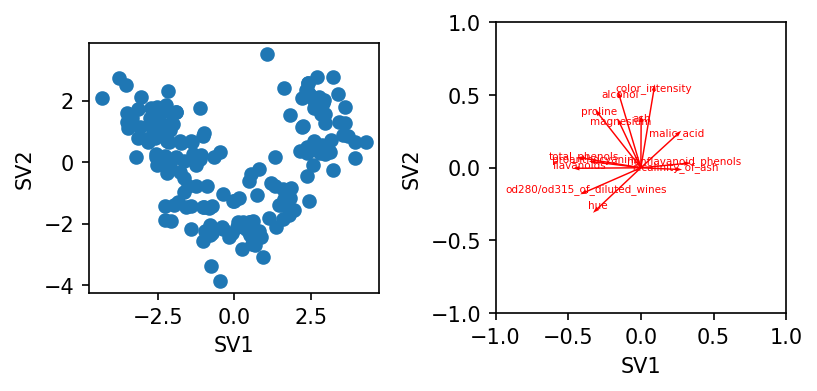

In [30]:
from sklearn.datasets import load_wine

data_wine = load_wine()
X = data_wine['data']
feature_names = data_wine['feature_names']
X= (X- X.mean(axis=0))/X.std(axis=0)

q, s, p, nssd = truncated_svd(X) 
X_new = X.dot(p[:,:2])
plot_svd(X_new, feature_names, p)

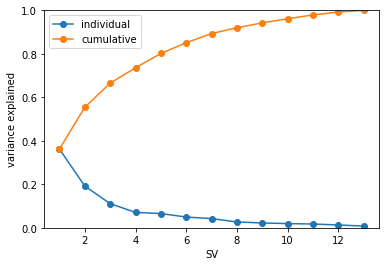

In [43]:
fig, ax = plt.subplots()
ax.plot(range(1, len(nssd)+1), nssd, 'o-', label = 'individual')
ax.plot(range(1, len(nssd)+1), nssd.cumsum(), 'o-', label = 'cumulative')
ax.legend()
ax.set_ylim(0,1)
ax.set_xlabel('SV')
ax.set_ylabel('variance explained');

- From the plots above, we can say the following:- `flavanoids` is the dominant feature for SV1 with a negative projetion while the `color_intensity` is the dominant feature for SV2 with a positive projection.

- These features are closely related to each other: (1) `total_phenols`, `flavanoids`, and `proanthocyanins`; (2) `nonflavanoid_phenols` and `alcalinity_of_ash`; and (3) `magnesium` and `alcohol`.- `malic_acid` and `hue` have a negative correlation-

- There seems to be no correlation between `ash` and `flavanoids`.


- Based from the scree plot, we would consider 9 SVs to obtain atleast 94% variance explained. 

# Latent semantic analysis

One advantage of Truncated SVD over PCA is that SVD does not require the dataset to be mean-centered. This is desirable for sparse datasets wherein mean-centering them could lead to dense matrices unless the mean is already zero. Bag-of-words and TF-IDF matrices are usually sparse so Truncated SVD is typically used on them instead of PCA. In that case, the process is known as Latent Semantic Analysis (LSA).

Let us perform latent semantic analysis on the newsgroups dataset.

In [22]:
data_newsgroups = fetch_20newsgroups(
    subset='train', 
    categories=['comp.graphics', 'rec.autos'],
    shuffle=False, 
    remove=['headers', 'footers', 'quotes'])
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'[a-z-]+', 
                                   stop_words='english',
                                   min_df=5)
bow_ng = tfidf_vectorizer.fit_transform(data_newsgroups['data'])
nonzeros = bow_ng.sum(axis=1).nonzero()[0]
bow_ng = bow_ng[nonzeros]
target_ng = data_newsgroups['target'][nonzeros]

In [23]:
q_ng, s_ng, p_ng, nssd_ng = truncated_svd(bow_ng.toarray())

We plot the variance explained for us to have an idea on the value of $k$.

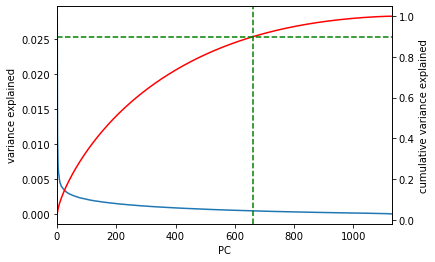

In [24]:
fig, ax = plt.subplots()
ax.plot(range(1, len(nssd_ng)+1), nssd_ng, '-', label='individual')
ax.set_xlim(0, len(nssd_ng)+1)
ax.set_xlabel('PC')
ax.set_ylabel('variance explained')
ax = ax.twinx()
ax.plot(range(1, len(nssd_ng)+1), nssd_ng.cumsum(), 'r-', label='cumulative')
ax.axhline(0.9, ls='--', color='g')
ax.axvline(662, ls='--', color='g')
ax.set_ylabel('cumulative variance explained');

If we want to retain a cumulative variance explained of 0.9, then we have to retain 662 singular vectors.

In [25]:
X_ng = project_svd(q_ng, s_ng, 662)

We plot the projected dataset below.

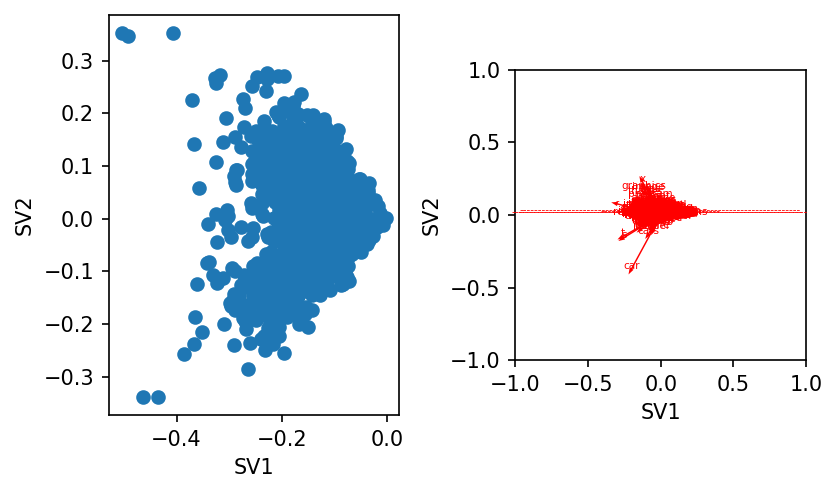

In [26]:
plot_svd(X_ng, tfidf_vectorizer.get_feature_names(), p_ng)

There's a lot of original features that it's difficult to read the labels and arrows. We can instead look at the weights for each singular vector.

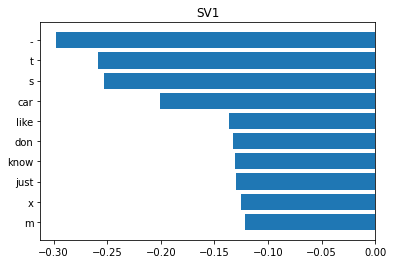

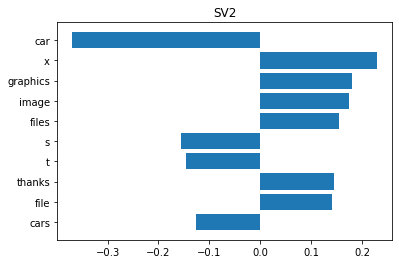

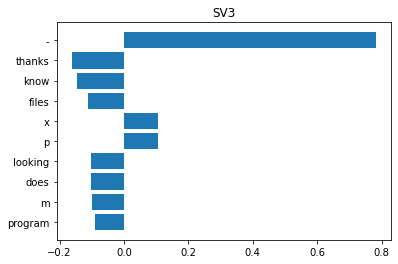

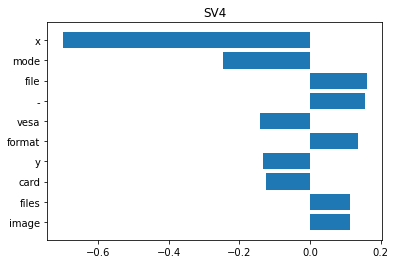

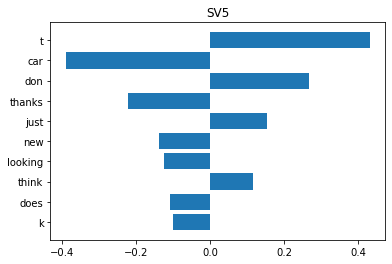

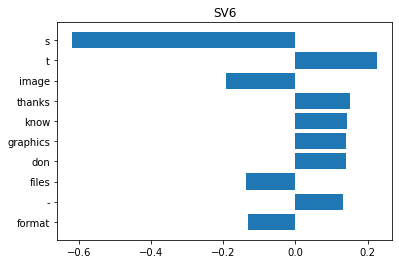

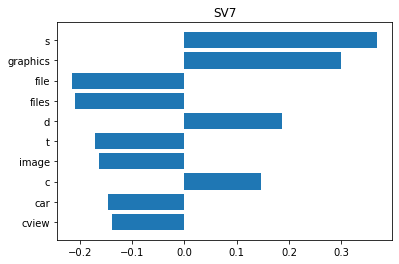

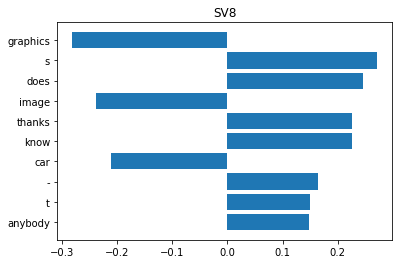

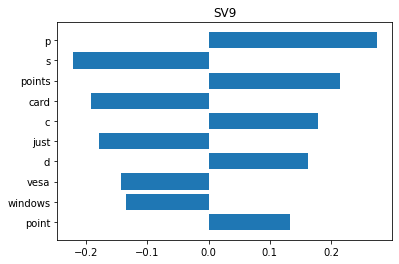

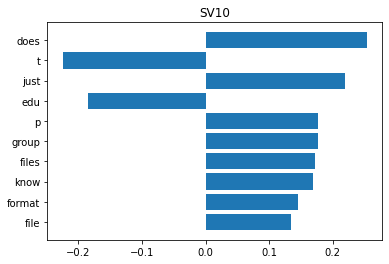

In [27]:
feature_names = tfidf_vectorizer.get_feature_names()
for i in range(10):
    fig, ax = plt.subplots()
    order = np.argsort(np.abs(p_ng[:, i]))[-10:]
    ax.barh([feature_names[o] for o in order], p_ng[order, i])
    ax.set_title(f'SV{i+1}')

**Problem 9**

Interpret the LSA results above.

- It is negatively correlated with car. This could mean this component talks about how the article lacks the tern cars.
- This component talks about graphics, images and files or we can interpret it as the component about computers.
- This component talks less about know and thanks. More analysis should be done to understand this component. Maybe this topic is in contrast with articles that show gratitude.
- This is negatively correlated with mode and and it seems to be correlated with file and image.
- It is negatively correlated with car.

# References
* C. Shalizi, Statistics 36-350 lecture notes, http://www.stat.cmu.edu/~cshalizi/350/lectures/11/lecture-11.pdf
* C. Aggarwal, Data Mining: The Textbook, Chapter 2.